# 梯度下降
## 1 算法简介

>思考：我们给出一组房子面积，卧室数目以及对应房价数据，如何从数据中找到房价y与面积x<sub>1</sub>和卧室数目x<sub>2</sub>的关系？

![intropic](./Img/intro.png)
为了实现监督学习，我们选择采用自变量x1、x2的线性函数来评估因变量y值，得到：
![param1](./Img/param1.png)
在公式中$\theta$<sub>1</sub>和$\theta$<sub>2</sub>分别代表自变量$x$<sub>1</sub>和$x$<sub>2</sub>的权重(weights)，$\theta$<sub>0</sub>代表偏移量。为了方便，我们将评估值写作h(x)，令x<sub>0</sub>=1，则h(x)可以写作：
![param2](./Img/param2.png)
其中n为输入样本数的数量。为了得到权重的值，我们需要令我们目前的样本数据评估出的h(x)尽可能的接近真实y值。这里我们定义误差函数(cost function)来表示h(x)和y值相接近的程度：
![param3](./Img/param3.png)
这里的系数$\frac{1}{2}$是为了后面求解偏导数时可以与系数相互抵消。我们的目的是要误差函数尽可能的小，即求解权重使误差函数尽可能小。
 <img src="./Img/pic3.png" width = "500" height = "500" alt="fig3" align=center />
如上图所示，只要自变量x沿着负梯度的方向变化，就可以到达函数的最小值了，反之，如果沿着正梯度方向变化，就可以到达函数的最大值。 
我们要求解J函数的最小值，那么就要求出每个$\theta_{j}(j=0,1,2...n)$的梯度，由于梯度太大，可能会导致自变量沿着负梯度方向变化时，J的值出现震荡，而不是一直变小，所以在梯度的前面乘上一个很小的系数$\alpha$（学习率），对初始化的系数进行更新： 
![param4](./Img/param4.png)
梯度计算公式（即偏导数）：
![param5](./Img/param5.png)
不断对系数进行更新，直至收敛（$\theta_{j}$的值几乎不发生变化），公式中m为数据样本的组数，i为第i组数据：
![algo1](./Img/algo1.png)
最后得到的$\theta_{j}$便是最终我们需要求解的线性方程的系数。

## 2 代码示例
首先先假设现在我们需要求解目标函数$func(x) = x * x$的极小值，由于func是一个凸函数，因此它唯一的极小值同时也是它的最小值，其一阶导函数为$dfunc(x) = 2 * x$

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 目标函数:y=x^2
def func(x):
    return np.square(x)


# 目标函数一阶导数也即是偏导数:dy/dx=2*x
def dfunc(x):
    return 2 * x

接下来编写梯度下降法函数：

In [4]:
# Gradient Descent
def GD(x_start, df, epochs, lr):
    """
    梯度下降法。给定起始点与目标函数的一阶导函数，求在epochs次迭代中x的更新值
    :param x_start: x的起始点
    :param df: 目标函数的一阶导函数
    :param epochs: 迭代周期
    :param lr: 学习率
    :return: x在每次迭代后的位置（包括起始点），长度为epochs+1
    """
    xs = np.zeros(epochs+1)
    x = x_start
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        # v表示x要改变的幅度
        v = - dx * lr
        x += v
        xs[i+1] = x
    return xs

在demo_GD中，我们直观地展示了如何利用梯度下降法的搜索过程：

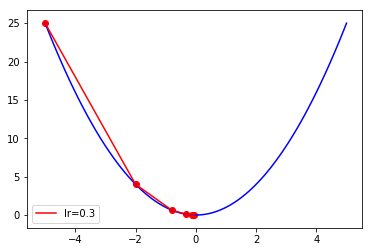

In [54]:
def demo_GD():
    # 演示如何使用梯度下降法GD()
    line_x = np.linspace(-5, 5, 100)
    line_y = func(line_x)

    x_start = -5
    epochs = 5

    lr = 0.3
    x = GD(x_start, dfunc, epochs, lr=lr)

    color = 'r'
    plt.plot(line_x, line_y, c='b')
    plt.plot(x, func(x), c=color, label='lr={}'.format(lr))
    plt.scatter(x, func(x), c=color, )
    plt.legend()
    plt.show()
demo_GD()

从运行结果来看，当学习率为0.3的时候，迭代5个周期似乎便能得到不错的结果了。
> **思考：**在上述函数中，改变学习率，会对拟合的结果造成怎样的结果？请同学们尝试着将学习率(lr)改为0.1，0.5，0.9,观察上图的变化。

# 3 练习题
回到我们之前的问题，给定数据集dataSet，每一行代表一组数据记录,每组数据记录中，第一个值为房屋面积（单位：平方英尺），第二个值为房屋中的房间数，第三个值为房价（单位：千美元），试用梯度下降法，构造损失函数，在函数gradientDescent中实现房价price关于房屋面积area和房间数rooms的线性回归，返回值为线性方程$price=\theta_0 + \theta_1 * area + \theta_2 * rooms$中系数$\theta_i(i=0,1,2)$的列表。

### 方法一 

In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
import seaborn as sns
dataPath = r"./Input/data1.csv"
dataSet = pd.read_csv(dataPath,header=None)
def normalize_feature(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        newDataFrame[c] = ((d - MIN) / (MAX - MIN)).tolist()
    return newDataFrame
dataSet = normalize_feature(dataSet)
zero = pd.DataFrame({'theta0': np.ones(len(dataSet))})
X = pd.concat([zero, dataSet[0],dataSet[1]],axis = 1)
price = np.array(dataSet.iloc[:, -1])

print(X)
print(type(X))
print(X.shape)
print(price)
print(price.shape)
print(type(price))

   theta0         0    1
0     1.0  0.434343  0.5
1     1.0  0.116162  0.5
2     1.0  0.621212  0.5
3     1.0  0.000000  0.0
4     1.0  1.000000  1.0
<class 'pandas.core.frame.DataFrame'>
(5, 3)
[0.33333333 0.         0.18571429 0.05714286 1.        ]
(5,)
<class 'numpy.ndarray'>


In [40]:
def costFunction(theta, X, price):
    """
    误差函数的定义
    """
    m = len(dataSet)
    _loss = X.dot(theta) - price;  # X是5*3的矩阵，theta是先3*1的矩阵，点乘后获得5*1的矩阵
    cost = _loss.T.dot(_loss) / (2 * m)# MSE定义
    return cost

def gradient(theta, X, price):
    """
    求梯度
    """
    m = len(dataSet)
    _gradient = X.T.dot(X.dot(theta)- price) # 梯度下降公式（求偏导数）
    return _gradient / m

def gradientDescent(theta, X, price, lr, epochs ):
    """
    梯度下降
    :param lr:学习率
    :param epochs：训练轮数
    """
    _cost = [costFunction(theta, X, price)]
    _theta = theta.copy() 
    for i in range(epochs):
        _theta = _theta - lr * gradient(_theta, X, price)
        _cost.append(costFunction(_theta, X, price))
    return _theta, _cost


theta = np.zeros(3)
epochs = 2000
lr = 0.01
theta, cost = gradientDescent(theta, X, price, lr, epochs )

In [41]:
cost

[0.11488662131519276,
 0.11263964326982964,
 0.11045776577892648,
 0.10833904377142263,
 0.10628159046619781,
 0.10428357562473152,
 0.10234322385614378,
 0.10045881297304657,
 0.09862867239668266,
 0.09685118160987437,
 0.09512476865634946,
 0.09344790868505296,
 0.09181912253809751,
 0.09023697538104308,
 0.08870007537423749,
 0.0872070723839871,
 0.0857566567323631,
 0.08434755798448576,
 0.08297854377216253,
 0.08164841865279095,
 0.0803560230024685,
 0.07910023194228419,
 0.07787995429679756,
 0.07669413158373954,
 0.07554173703399966,
 0.07442177464099162,
 0.0733332782385163,
 0.07227531060626838,
 0.07124696260215735,
 0.07024735232063942,
 0.06927562427628055,
 0.06833094861179415,
 0.06741252032981965,
 0.06651955854773066,
 0.06565130577478187,
 0.06480702721092513,
 0.06398601006664557,
 0.06318756290318696,
 0.06241101499255543,
 0.06165571569670887,
 0.06092103386535632,
 0.06020635725180999,
 0.05951109194634827,
 0.05883466182656538,
 0.0581765080241977,
 0.057536088407

/data/anaconda3/envs/jupyterhub/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/data/anaconda3/envs/jupyterhub/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

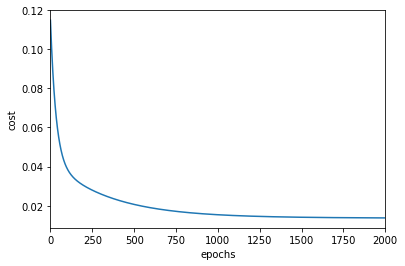

In [42]:
sns.tsplot(time=np.arange(len(cost)), data = cost)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show

### 方法二

In [53]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn import preprocessing
import seaborn as sns

# 加载原始数据
def load_data(path):
    dataSet = pd.read_csv(path,header=None)
    print("dataSet:\n",dataSet)
    return dataSet

# 对数据进行预处理， 归一化，切分数据
def preprocess_data(data):
    # 数据归一化处理
    min_max_scaler = preprocessing.MinMaxScaler()
    data_minmax = min_max_scaler.fit_transform(data)   

    print('归一化后\n',data_minmax)
    # 切分数据
    X = data_minmax[:,:-1]
    # 生成一列全为1 的数据
    X_1 = np.ones([X.shape[0],1])
    # 合并数据，第一列数据全为 1
    X = np.column_stack((X_1,X))
    print("X:\n",X)
    #  切分数据
    y = data_minmax[:,-1].reshape(-1,1)
    print("y\n",y)
    # 初始化 theta
    theta = np.zeros(3).reshape(-1,1)
    print("theta\n",theta)
    return X,y,theta


dataPath = r"./Input/data1.csv"
data = load_data(dataPath)
X,y,theta = preprocess_data(data)
  

dataSet:
       0  1    2
0  2104  3  400
1  1600  3  330
2  2400  3  369
3  1416  2  342
4  3000  4  540
归一化后
 [[0.43434343 0.5        0.33333333]
 [0.11616162 0.5        0.        ]
 [0.62121212 0.5        0.18571429]
 [0.         0.         0.05714286]
 [1.         1.         1.        ]]
X:
 [[1.         0.43434343 0.5       ]
 [1.         0.11616162 0.5       ]
 [1.         0.62121212 0.5       ]
 [1.         0.         0.        ]
 [1.         1.         1.        ]]
y
 [[0.33333333]
 [0.        ]
 [0.18571429]
 [0.05714286]
 [1.        ]]
theta
 [[0.]
 [0.]
 [0.]]


/data/anaconda3/envs/jupyterhub/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### 假设函数

In [54]:
def h_function(X,theta):
    return np.dot(X,theta)

### 损失函数

In [55]:
def error_function(X,y,theta):
    m = len(X)
    error =  y - h_function(X,theta)
    return np.dot(error.T,error)/float((2*m))

### 梯度函数

In [56]:
def gradient_function(X,y,theta):
    m = len(X)
    error = h_function(X,theta) - y
    return (1./m) * np.dot(X.T,error)   

### 梯度下降

In [60]:
def gradient_descent(X, y,theta,lr,epochs):
    theta_= theta.copy()
    error =[]
    error.append(error_function(X,y,theta_)[0][0])
    gradient = gradient_function(X, y,theta_)
    
    for i in range(epochs):
        theta_ = theta_ - lr * gradient
        gradient = gradient_function(X, y,theta_)
        error.append(error_function(X,y,theta_)[0][0])  ## 矩阵点乘 得到1*1 矩阵，需要把数据取出来
    
    return theta_,error
       

In [70]:
lr = 0.01
epochs = 1000
theta_,error = gradient_descent(X,y,theta,lr,epochs)

# print(len(error))
error

[0.11488662131519276,
 0.11263964326982963,
 0.11045776577892645,
 0.10833904377142263,
 0.10628159046619781,
 0.10428357562473152,
 0.10234322385614376,
 0.10045881297304657,
 0.09862867239668265,
 0.09685118160987435,
 0.09512476865634946,
 0.09344790868505296,
 0.09181912253809751,
 0.09023697538104308,
 0.08870007537423749,
 0.08720707238398709,
 0.0857566567323631,
 0.08434755798448576,
 0.08297854377216252,
 0.08164841865279095,
 0.0803560230024685,
 0.07910023194228419,
 0.07787995429679756,
 0.07669413158373954,
 0.07554173703399966,
 0.0744217746409916,
 0.07333327823851629,
 0.07227531060626838,
 0.07124696260215735,
 0.07024735232063942,
 0.06927562427628055,
 0.06833094861179415,
 0.06741252032981965,
 0.06651955854773066,
 0.06565130577478187,
 0.06480702721092511,
 0.06398601006664557,
 0.06318756290318696,
 0.062411014992555414,
 0.06165571569670886,
 0.06092103386535632,
 0.06020635725180997,
 0.05951109194634827,
 0.05883466182656538,
 0.058176508024197694,
 0.05753608

In [73]:
theta_

array([[-0.04305182],
       [ 0.46022541],
       [ 0.3421591 ]])

/data/anaconda3/envs/jupyterhub/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(*args, **kw)>

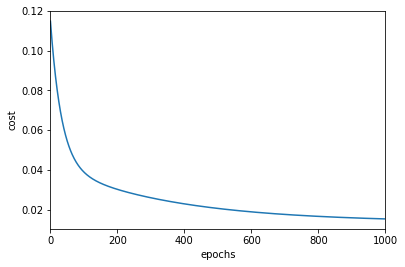

In [72]:
sns.tsplot(time=np.arange(len(error)), data = error)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show